# Shopping Mall Customer Segmentation.

### &emsp;&emsp; The goal is to obtain different customer groups for the shopping mall.

# Data Description:-

* <b>Customer ID</b>: The id for each customer.
* <b>Gender</b>: The gender of the customer.
* <b>Age</b>: The age of the customer
* <b>Annual Income</b>: Annual income of the customer.
* <b>Spending Score (1-100)</b>: The score given to a customer by the shopping mall authorities, based on the money spent and the behavior of the customer.

*******************************************
*******************************************

In [1]:
## Font Style
BOLD   = "\033[1m"
RESET  = "\033[0m"

RED    = "\033[31m"
GREEN = "\033[32m"
CYAN    = "\033[36m"

# Libraries:-

In [2]:
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset & Removing duplicate rows if any:-

In [4]:
Shopping_Mall_Data = pd.read_csv('C:\\Users\\Pranab_Kumar_Paul\Desktop\\Python_Script\\My_Script\\Python_Project(GitHub)\\Cluster\\Mall_Customers.csv', encoding='latin')
print(BOLD, 'Shape before deleting duplicate values:', Shopping_Mall_Data.shape, RESET)

# Removing duplicate rows if any
Shopping_Mall_Data= Shopping_Mall_Data.drop_duplicates()
print(BOLD, 'Shape After deleting duplicate values:', Shopping_Mall_Data.shape, RESET)

# Data Backup
DATA_BACKUP= Shopping_Mall_Data

print(BOLD, 'So this file contains {} customer details.'.format(len(Shopping_Mall_Data.index)), RESET)

# Printing sample data
Shopping_Mall_Data.head(10)

 Shape before deleting duplicate values: (200, 5) 
 Shape After deleting duplicate values: (200, 5) 
 So this file contains 200 customer details. 


,Customer ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Renaming Column

In [5]:
Shopping_Mall_Data.rename(columns = {'Annual Income (k$)':'Annual_Income',
                                     'Spending Score (1-100)': 'Spending_Score',
                                     'Customer ID':'Customer_ID'}, inplace = True)
# Printing sample data
Shopping_Mall_Data.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Data Exploration:-

In [6]:
# Observing data types, Number of Missing values, Total rows etc.
Shopping_Mall_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [7]:
# Observing Descriptive statistics of the data
Shopping_Mall_Data.describe(include='all')

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
# Finding unique values for each column, to get a idea of which column is categorical and which one is Continuous.
Shopping_Mall_Data.nunique()

Customer_ID       200
Gender              2
Age                51
Annual_Income      64
Spending_Score     84
dtype: int64

# Basic Data Exploration Results:-

* <b>Customer_ID</b>: This column will not help in analysis. **Rejected**.
* <b>Gender</b>: Customer segmention can not be done depending upon Gender column. There are Males & Femails who spend more also there are males & &emsp;&emsp;&emsp;&emsp;Femails who spend less. **Rejected**.
* <b>Age</b>: Continuous. Selected.
* <b>Annual_Income</b>: Continuous. Selected.
* <b>Spending_Score</b>: Continuous. Selected.

# Creating Variable:-

In [9]:
# All Continuous Column
CONTINUOUS_COLUMN_NAMES= ['Age', 'Annual_Income', 'Spending_Score']

# Useless Columns
Useless_Columns = ['Customer_ID','Gender']

# Removing useless columns from the data:-

In [10]:
# Deleting the useless column.
Shopping_Mall_Data = Shopping_Mall_Data.drop(Useless_Columns,axis=1)

# Sample Data.
Shopping_Mall_Data.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Missing values treatment:-

In [11]:
# Finding how many missing values are there for each column
Shopping_Mall_Data.isnull().sum()

Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### &emsp;&emsp; There is no missing value.

# Visual Exploratory Data Analysis:-

### &emsp;&emsp; 1. Histogram for Continuous variable:

In [12]:
# Creating a function which can plot all the Histogram at once.
def plot_hist_charts(HIST_inpdata,HIST_column_name):    
    %matplotlib inline
    total_rows= 1
    try:
        HIST_inpdata.hist(column= CONTINUOUS_COLUMN_NAMES, figsize=(16,6), layout=(total_rows,int(np.ceil(len(CONTINUOUS_COLUMN_NAMES)/total_rows))))
        plt.suptitle('Histogram of :-'+ str(CONTINUOUS_COLUMN_NAMES), fontsize = 20)
        plt.show()
    except:
        print('Some thing is #### WRONG ####')

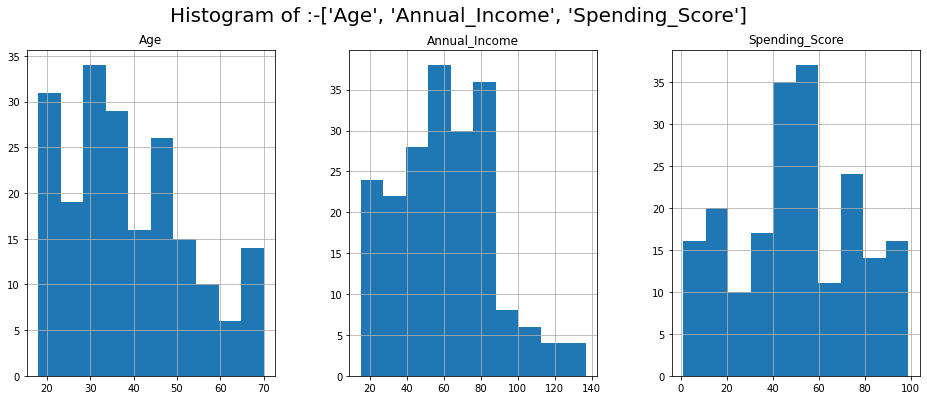

In [13]:
# Calling the function to plot all the Histogram at once.
plot_hist_charts(HIST_inpdata= Shopping_Mall_Data, HIST_column_name= CONTINUOUS_COLUMN_NAMES)

### &emsp;&emsp; 2. Correlation between the parameters.

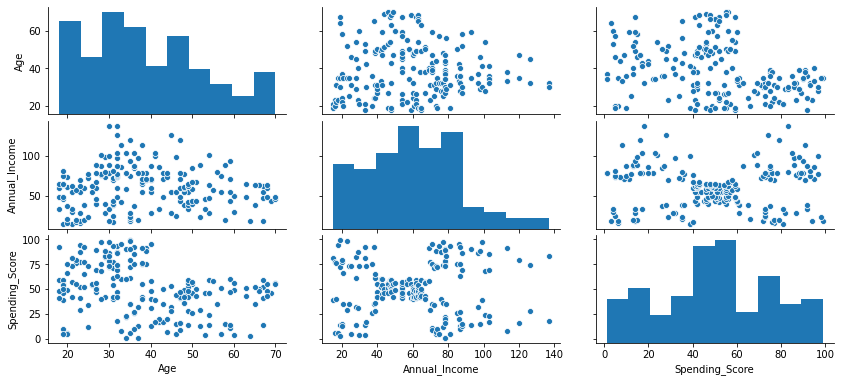

In [14]:
A= sns.pairplot(Shopping_Mall_Data, kind='scatter')
A.fig.set_size_inches(12,5)
plt.show()

## Visual Exploration Results:-

* <b>Age</b>: No relationship found between Age & Annual_Income or Age & Spending_Score.
* <b>Annual_Income</b>: It's an independent variable. **Selected**.
* <b>Spending_Score</b>: It's dependent on Annual_Income. It can be low or high based on requirement or seasonality. So, it is not fixed. **Selected**.

# Descriptive statistics :-

In [15]:
# Creating a function which give descriptive statistics.
def descriptive_statistics(DF_name, column_name):
    column_data= DF_name[column_name]    
    if column_data.dtype == "int64" or column_data.dtype == "float64":
        data_frame= pd.DataFrame([[column_name, np.mean(column_data), np.median(column_data), np.std(column_data), np.var(column_data)]], 
                            columns = ["Variable Name", "Mean", "Median", "Standard Deviation", "Variance"])
        return data_frame.style.hide_index()    
    else:
        return pd.DataFrame(column_data.value_counts())  

In [16]:
# Call the function for column wise descriptive statistics
for i in CONTINUOUS_COLUMN_NAMES:
    display(descriptive_statistics(DF_name= Shopping_Mall_Data, column_name= i))   

Variable Name,Mean,Median,Standard Deviation,Variance
Age,38.850000,36.000000,13.934041,194.157500


Variable Name,Mean,Median,Standard Deviation,Variance
Annual_Income,60.560000,61.500000,26.198977,686.386400


Variable Name,Mean,Median,Standard Deviation,Variance
Spending_Score,50.200000,50.000000,25.758882,663.520000


# Generating the input values for the model.

In [17]:
DataForML= Shopping_Mall_Data[['Annual_Income','Spending_Score']]
# Printing sample rows
X=DataForML.values
X[:4]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77]], dtype=int64)

# Standardization/Normalization of data:-

In [18]:
### Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Printing sample values.
X[:4]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ]])

# KMeans Clustering.
### &emsp;&emsp;  Finding Best number of clusters for KMeans.

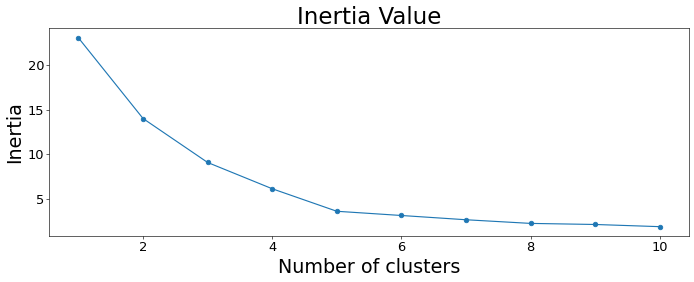

In [19]:
# Finding the best number of clusters based on the inertia value.
from sklearn.cluster import KMeans
inertiaValue = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)    
    km.fit(X)
    inertiaValue.append(km.inertia_)

%matplotlib inline
fig= plt.figure(figsize= (15,5), dpi= 55)
plt.plot(range(1, 11), inertiaValue, marker='o')

plt.xlabel('Number of clusters', fontsize= 25)
plt.ylabel('Inertia', fontsize= 25)

plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

plt.title("Inertia Value",fontsize= 30)
plt.show()

## &emsp; Using above graph the optimal number of clusters are 5.
## KMeans Clustering with 5 clusters.

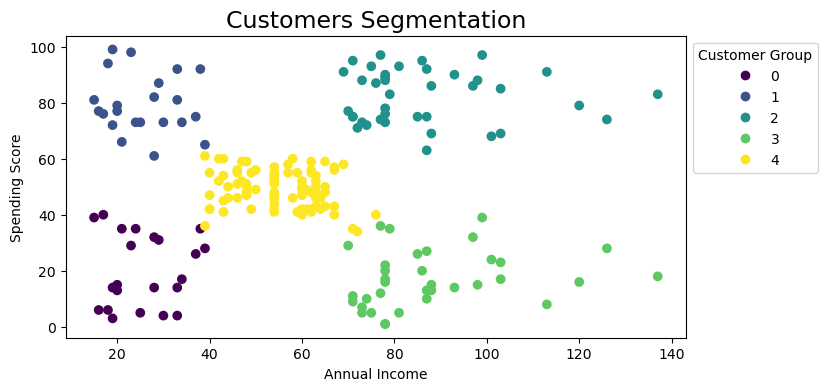

In [20]:
# Defining the K-Means object for best number of clusters.
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=3)
predicted_Cluster = km.fit_predict(X)

# Plot K-Means.
%matplotlib inline
fig= plt.figure(figsize= (8,4), dpi= 100)
A= plt.scatter(x=Shopping_Mall_Data['Annual_Income'], y=Shopping_Mall_Data['Spending_Score'], c= predicted_Cluster)

plt.title('Customers Segmentation', fontsize= 17)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(handles= A.legend_elements()[0], labels= [str(i) for i in set(predicted_Cluster)],title = "Customer Group",bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## Observation:-
#### &emsp;&emsp;&emsp; 1. In the group of Annual Income between 0 to 40, a few customers are having low Spending Score (0 to 40) & a few customers are having &emsp;&emsp;&emsp;&emsp; high Spending Score (60 to 100) . <br><br>&emsp;&emsp;&emsp; 2. In the group of Annual Income between 40 to 80, a few customers are having medium Spending Score (40 to 60). <br><br>&emsp;&emsp;&emsp; 3. In the group of Annual Income between 70 to 140, a few customers are having low Spending Score (0 to 40) & a few customers are having &emsp;&emsp;&emsp;&emsp; high Spending Score (60 to 100) .

## &emsp;&emsp; So, Customer Group - 2 and 1 is Profitable for the Shopping Mall due to their high Spending_Score.

In [21]:
# Running the clustering algorithm on the data set
predicted_Cluster = km.fit_predict(X)
print(predicted_Cluster)
print('\n __Inertia:__', km.inertia_)

## Creating cluster id.
Shopping_Mall_Data['KMeans_Cluster_ID']=predicted_Cluster

# Print Profitable customers.
Shopping_Mall_Data[Shopping_Mall_Data['KMeans_Cluster_ID'].isin( [1, 2]) ]

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 4 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 3 2 4 2 3 2 3 2 4 2 3 2 3 2 3 2 3 2 4 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]

 __Inertia:__ 3.5834407128859715


,Age,Annual_Income,Spending_Score,KMeans_Cluster_ID
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
...,...,...,...,...
191,32,103,69,2
193,38,113,91,2
195,35,120,79,2
197,32,126,74,2


****
****

# Hierarchical Clustering.
### &emsp;&emsp; 1. Finding Best number of clusters for Hierarchical Clustering using Dendrogram.

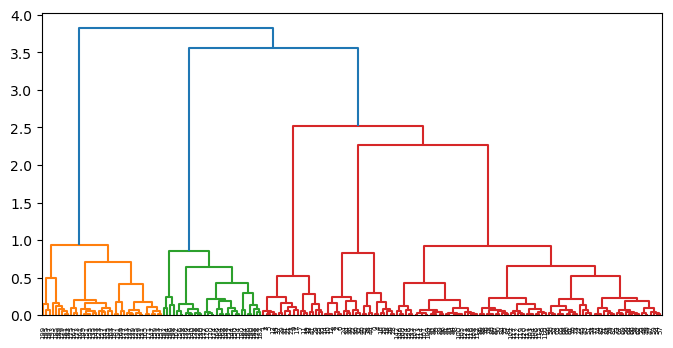

In [22]:
%matplotlib inline
fig= plt.figure(figsize= (8,4), dpi= 100)

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

### &emsp; Using above Dendrogram the optimal number of clusters are 5.

### &emsp;&emsp; 2. Finding Best number of clusters for Hierarchical Clustering using Silhouette Coefficient.

In [23]:
## Finding Optimal Number of clusters using silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Defining the list of clusters to try
n_clusters_list= np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data= pd.DataFrame()

for n_clusters_trial in n_clusters_list:   
        
    # Generating Hierarchical clusters    
    hc = AgglomerativeClustering(n_clusters= n_clusters_trial, affinity= 'euclidean', linkage= 'ward')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score= silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data= silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))
silhouette_scores_data

,score,Clusters
0,0.390901,2
0,0.447962,3
0,0.497642,4
0,0.558270,5
0,0.529667,6
0,0.409308,7
0,0.410551,8
0,0.417721,9


In [24]:
# Finding out the best nmber of clusters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,Clusters
0,0.55827,5


### &emsp; Using Silhouette Coefficient the optimal number of clusters are 5.

## Agglomerative Clustering.

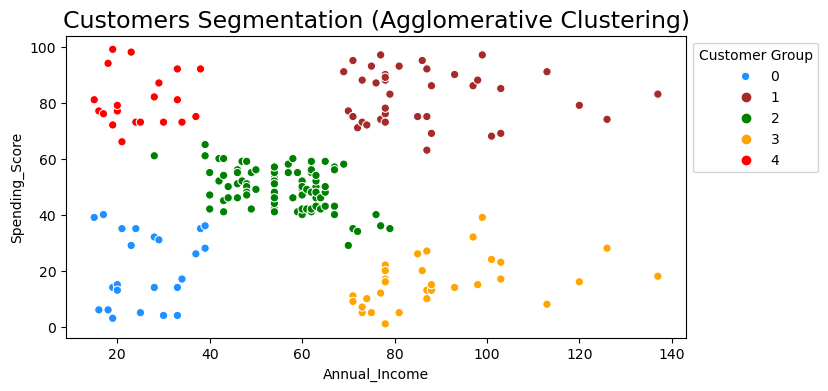

In [25]:
# Creating 5 Clusters Based on the dendogram visually
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
predicted_Agglomerative_Cluster= hc.fit_predict(X)
 
### Plotting the predicted clusters
fig= plt.figure(figsize= (8,4), dpi= 100)
color_dict = dict({0:'brown', 1:'green', 2:'orange', 3:'red', 4:'dodgerblue'})

g= sns.scatterplot(x='Annual_Income', y='Spending_Score', data= Shopping_Mall_Data, hue= predicted_Agglomerative_Cluster, palette=color_dict)
plt.title('Customers Segmentation (Agglomerative Clustering)', fontsize= 17)
g.legend(loc="upper left", bbox_to_anchor=(1,1), title = "Customer Group",labels= [str(i) for i in set(predicted_Agglomerative_Cluster)])
plt.show()

## &emsp;&emsp; So, Customer Group - 1 and 4 is Profitable for the Shopping Mall due to their high Spending_Score.

In [26]:
print(predicted_Agglomerative_Cluster)

# Generating cluster id for each row using agglomerative algorithm
Shopping_Mall_Data['Agglomerative_ID']= predicted_Agglomerative_Cluster

# Print Profitable customers.
Shopping_Mall_Data.loc[Shopping_Mall_Data['Agglomerative_ID'].isin( [1,4]),['Age','Annual_Income','Spending_Score','Agglomerative_ID']]

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


,Age,Annual_Income,Spending_Score,Agglomerative_ID
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
...,...,...,...,...
126,43,71,35,1
132,25,72,34,1
142,28,76,40,1
146,48,77,36,1


******
******

# DBSCAN.
### &emsp;&emsp; Finding best parameter for DBSCAN.

In [27]:
## Finding best values of eps and min_samples for DBSCAN.
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.001)
min_sample_list=np.arange(start=2, stop=8, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:- " + str(eps_trial.round(1)) +" min_sample:- " + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], 
                                                                          columns=["score", "parameters"]))
# silhouette_scores_data

In [28]:
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.422354,eps:- 0.1 min_sample:- 7



 #### The optimal number of clusters are 5.


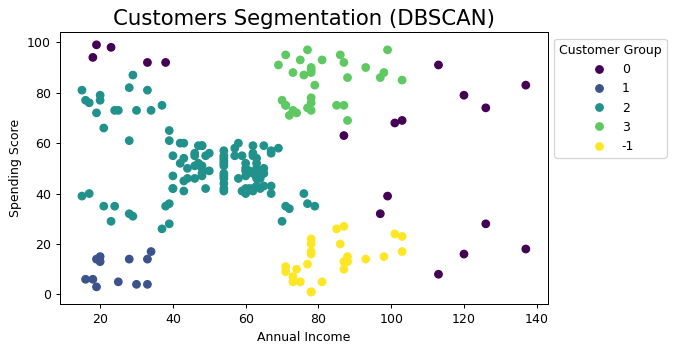

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=7)

predicted_DBSCAN_Cluster=  db.fit_predict(X)

# Generating cluster id for each row using agglomerative algorithm
Shopping_Mall_Data['DBSCAN_ID']= predicted_DBSCAN_Cluster

# Plotting the predicted clusters
fig= plt.figure(figsize= (7,4), dpi= 90)
A= plt.scatter(x=Shopping_Mall_Data['Annual_Income'], y=Shopping_Mall_Data['Spending_Score'], c=predicted_DBSCAN_Cluster)
plt.title('Customers Segmentation (DBSCAN)', fontsize= 17)
plt.legend(handles= A.legend_elements()[0], labels= [str(i) for i in set(predicted_DBSCAN_Cluster)], title = "Customer Group",bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

print('\n #### The optimal number of clusters are {}.'.format(len(set(Shopping_Mall_Data['DBSCAN_ID']))))

In [30]:
print(predicted_DBSCAN_Cluster)
# Print Profitable customers.
Shopping_Mall_Data[['Age','Annual_Income','Spending_Score','DBSCAN_ID']]

[ 1  1  0  1  1  1  0 -1  0  1  0 -1  0  1  0  1  1  1  1 -1  1  1  0  1
  0  1  1  1  1  1  0  1  0 -1  0  1  0  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  1  2  1  2  3  2  3  2  1  2  3  2  3  2  3  2  3  2  1  2
  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  1  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2 -1  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


,Age,Annual_Income,Spending_Score,DBSCAN_ID
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


## Observation:-

### &emsp;&emsp; DBSCAN is not giving  clear separation.

***
***

# K-Means algorithm is giving me clear separation of profitable customers.
### So, running the algorithm once again.

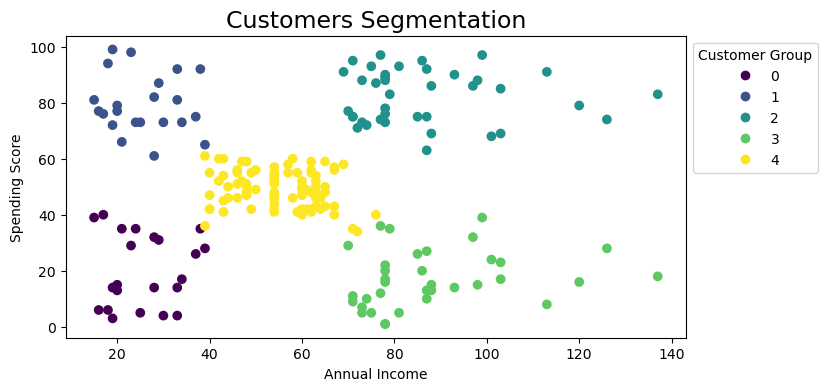

In [31]:
# Defining the K-Means object for best number of clusters.
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=3)
predicted_Cluster = km.fit_predict(X)

# Plot K-Means.
%matplotlib inline
fig= plt.figure(figsize= (8,4), dpi= 100)
A= plt.scatter(x=Shopping_Mall_Data['Annual_Income'], y=Shopping_Mall_Data['Spending_Score'], c= predicted_Cluster)
plt.title('Customers Segmentation', fontsize= 17)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.legend(handles= A.legend_elements()[0], labels= [str(i) for i in set(predicted_Cluster)],title = "Customer Group",bbox_to_anchor=(1,1), loc="upper left")
plt.show()

### &emsp;&emsp; Here I am printing the KMeans Cluster ID where ID 1 & 2 indicate profitable customers.

In [32]:
pd.set_option("display.max_rows", len(Shopping_Mall_Data))
Shopping_Mall_Data[['Age','Annual_Income','Spending_Score','KMeans_Cluster_ID']]

,Age,Annual_Income,Spending_Score,KMeans_Cluster_ID
0,19,15,39,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0
5,22,17,76,1
6,35,18,6,0
7,23,18,94,1
8,64,19,3,0
9,30,19,72,1
